## About the dataset


The dataset comes from the CDC Behavioral Risk Factor Surveillance System (BRFSS), which collects health-related information from U.S. adults. 

It has 445132rows*40cols about demographics, lifestyle habits, physical health, and chronic diseases. The machine learning task focuses on 

predict if a person has a heart disease using health and lifestyle factors such as age, BMI, smoking, and physical activity. https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### 1. Data Import


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [3]:
df=pd.read_csv('heart_2022_with_nans.csv')
display(df.head().T)

,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Female,Female,Female,Female
GeneralHealth,Very good,Excellent,Very good,Excellent,Fair
PhysicalHealthDays,0.0,0.0,2.0,0.0,2.0
MentalHealthDays,0.0,0.0,3.0,0.0,0.0
LastCheckupTime,Within past year (anytime less than 12 months ...,NaN,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,No,No,Yes,Yes,Yes
SleepHours,8.0,6.0,5.0,7.0,9.0
RemovedTeeth,NaN,NaN,NaN,NaN,NaN
HadHeartAttack,No,No,No,No,No


In [4]:
df.columns,len(df.columns)

(Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
        'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
        'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
        'DifficultyConcentrating', 'DifficultyWalking',
        'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
        'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
        'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
        'HighRiskLastYear', 'CovidPos'],
       dtype='object'),
 40)

In [5]:
df.shape

(445132, 40)

In [6]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [7]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

### 2. Heart Attack Cases Distribution

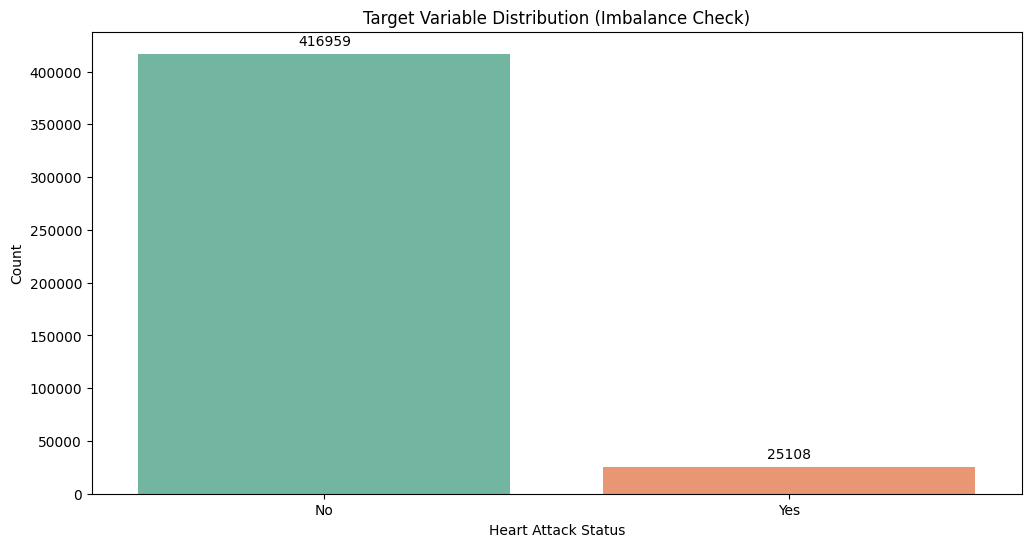

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='HadHeartAttack', data=df, palette='Set2')
plt.title('Target Variable Distribution (Imbalance Check)')
plt.xlabel('Heart Attack Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.show()

### 3.BMI Research

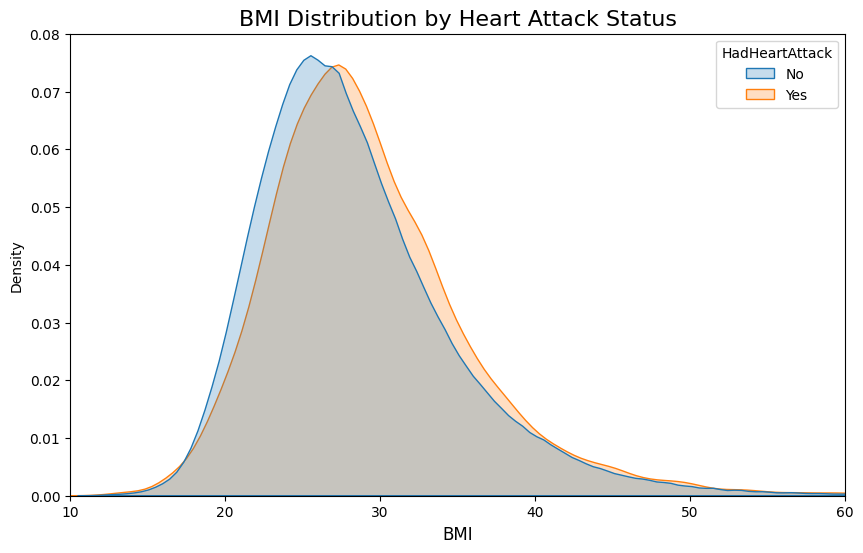

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='HadHeartAttack', fill=True, common_norm=False)
plt.title('BMI Distribution by Heart Attack Status', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.xlim(10, 60) 
plt.show()

### 4.Body Healthy Condition

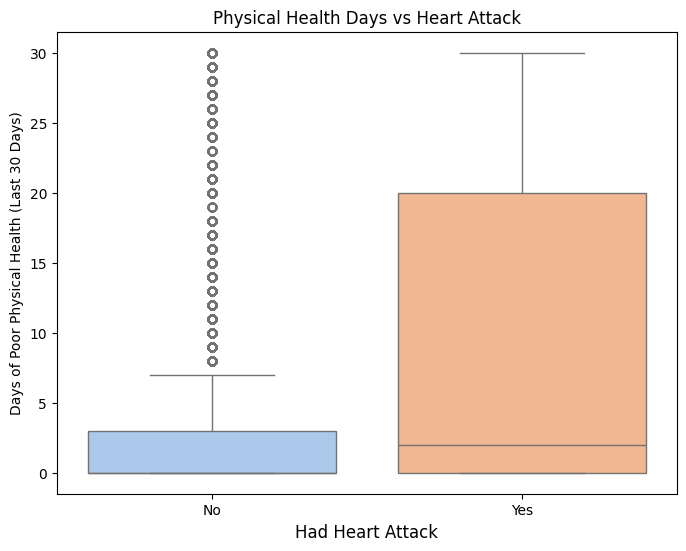

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HadHeartAttack', y='PhysicalHealthDays', data=df, palette='pastel')
plt.title('Physical Health Days vs Heart Attack')
plt.xlabel('Had Heart Attack', fontsize=12)
plt.ylabel('Days of Poor Physical Health (Last 30 Days)')
plt.show()

### 5. Age Distribution Of Heart Disease Patients

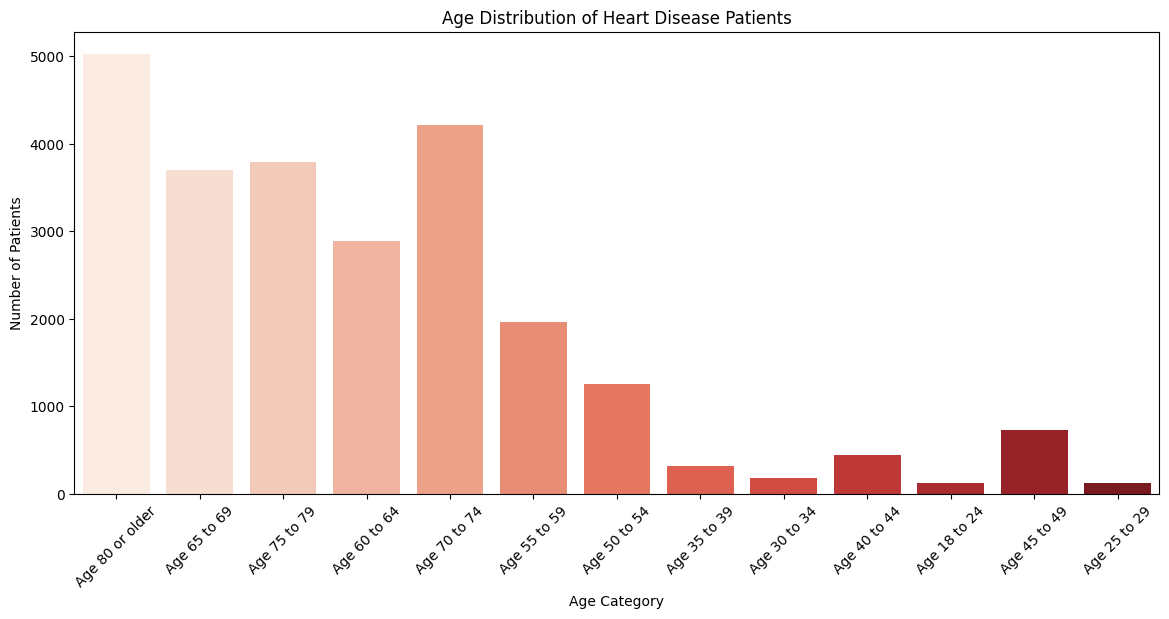

In [11]:
heart_patients = df[df['HadHeartAttack'] == 'Yes'] 
plt.figure(figsize=(14, 6))
sns.countplot(
    x='AgeCategory', 
    data=heart_patients, 
    palette='Reds'    
)
plt.title('Age Distribution of Heart Disease Patients')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45) 
plt.show()

### 6. Correlation Matrix

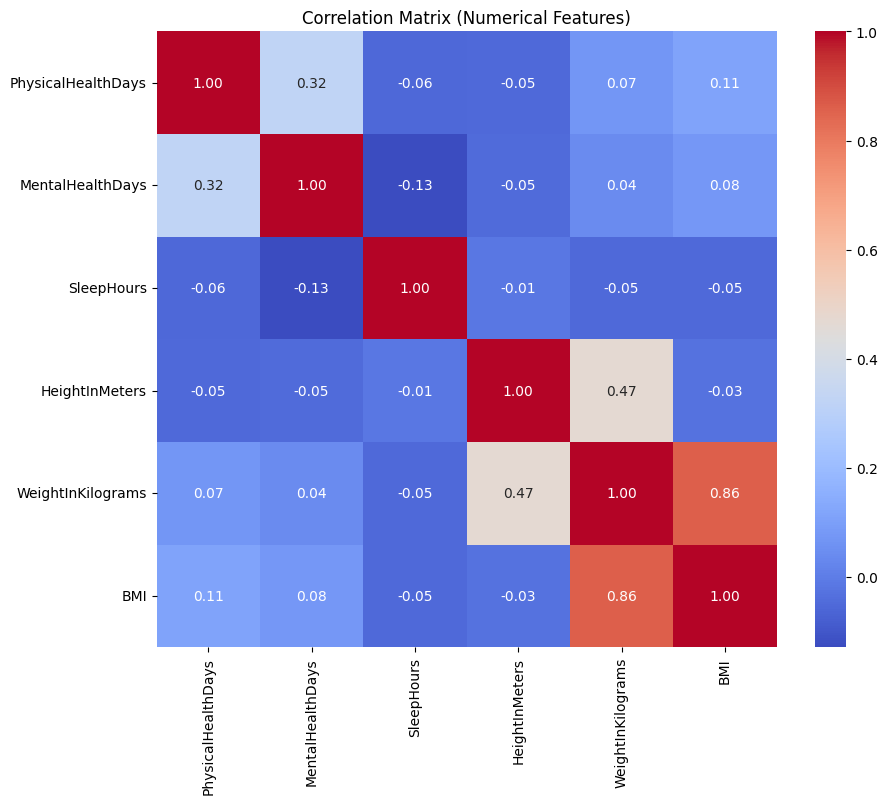

In [12]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()